In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from pywt import scale2frequency

In [2]:
scales = np.arange(1,31,1)
def upwell(ektrxs, ektrys, coast_angle):
    pi = 3.1415927
    degtorad = pi/180.
    alpha = (360 - coast_angle) * degtorad
    s1 = np.cos(alpha)
    t1 = np.sin(alpha)
    s2 = -1 * t1
    t2 = s1
    res = []
    for x, y in zip(ektrxs, ektrys):
        x = float(x)
        y = float(y)
        perp = (s1 * x) + (t1 * y)
        para = (s2 * x) + (t2 * y)
        res.append(perp/10)
    return(res)
df_30_whole = pd.read_csv('1982-22-30.csv')
df_30_whole = df_30_whole.iloc[1: , :]
df_30_whole['combined'] = upwell(df_30_whole['ektrx'], df_30_whole['ektry'], 210)
signal = df_30_whole['combined']
coef, freqs = pywt.cwt(signal, scales, 'gaus1')

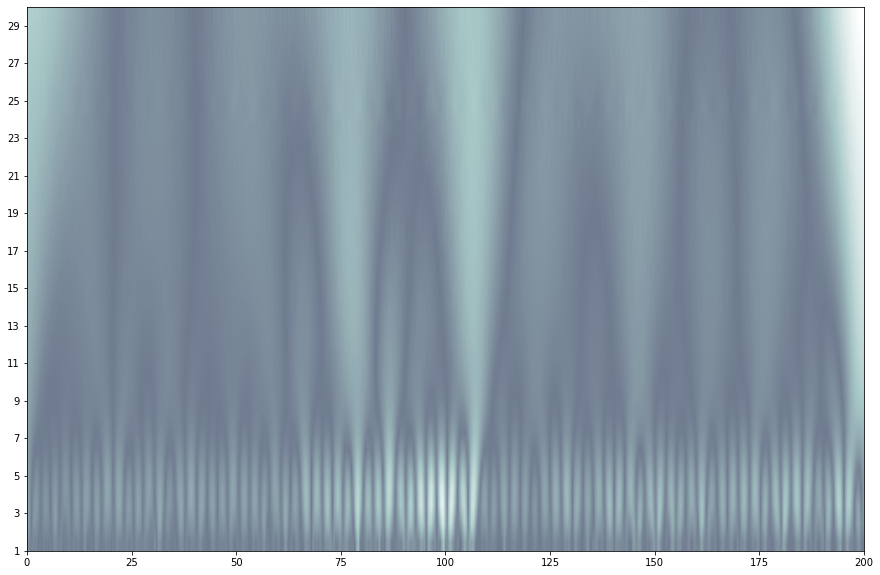

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(abs(coef),extent=[0,200,30,1], interpolation='bilinear', cmap='bone',
          aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,2))
N = df_30_whole.shape[0]
t0=1982
dt= (1/12)
time = np.arange(0, N) * dt + t0
sampling_period = 1/12
wavelet = 'gaus1'
f = scale2frequency(wavelet, scales)/sampling_period
# plt.yticks(1/f)
# plt.xticks(time)
plt.show()

In [4]:
print(f)

[2.4        1.2        0.8        0.6        0.48       0.4
 0.34285714 0.3        0.26666667 0.24       0.21818182 0.2
 0.18461538 0.17142857 0.16       0.15       0.14117647 0.13333333
 0.12631579 0.12       0.11428571 0.10909091 0.10434783 0.1
 0.096      0.09230769 0.08888889 0.08571429 0.08275862 0.08      ]


In [5]:
print(1/f)

[ 0.41666667  0.83333333  1.25        1.66666667  2.08333333  2.5
  2.91666667  3.33333333  3.75        4.16666667  4.58333333  5.
  5.41666667  5.83333333  6.25        6.66666667  7.08333333  7.5
  7.91666667  8.33333333  8.75        9.16666667  9.58333333 10.
 10.41666667 10.83333333 11.25       11.66666667 12.08333333 12.5       ]


In [6]:
def read_file(file_name):
    df = pd.read_csv(file_name)
    df = df.iloc[1: , :]
    res = upwell(df['ektrx'], df['ektry'], 210)
    return res

lat_24 = read_file('40years-24.5.csv')
lat_25 = read_file('40years-25.5.csv')
lat_26 = read_file('40years-26.5.csv')
lat_27 = read_file('40years-27.5.csv')
lat_28 = read_file('40years-28.5.csv')
lat_29 = read_file('40years-29.5.csv')
lat_30 = read_file('40years-30.5.csv')
lat_31 = read_file('40years-31.5.csv')

latitude homogenization

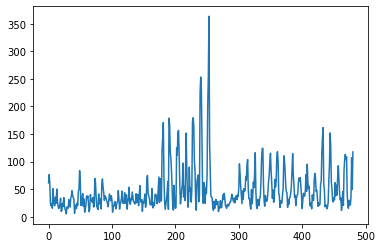

In [7]:
sd = []
total = [lat_24, lat_25, lat_26, lat_27, lat_28, lat_29, lat_30, lat_31]
for i in range(len(lat_24)):
    summation = 0
    for j in range(len(total)):
        summation += total[j][i]
    summation = summation / len(total)
    final = 0
    for z in total:
        final += (z[i] - summation)**2 / (len(total) - 1)
    final = np.sqrt(final)
    sd.append(final)
plt.plot(range(len(sd)),sd)

seasonal cycle, 2,fit moving ave, 

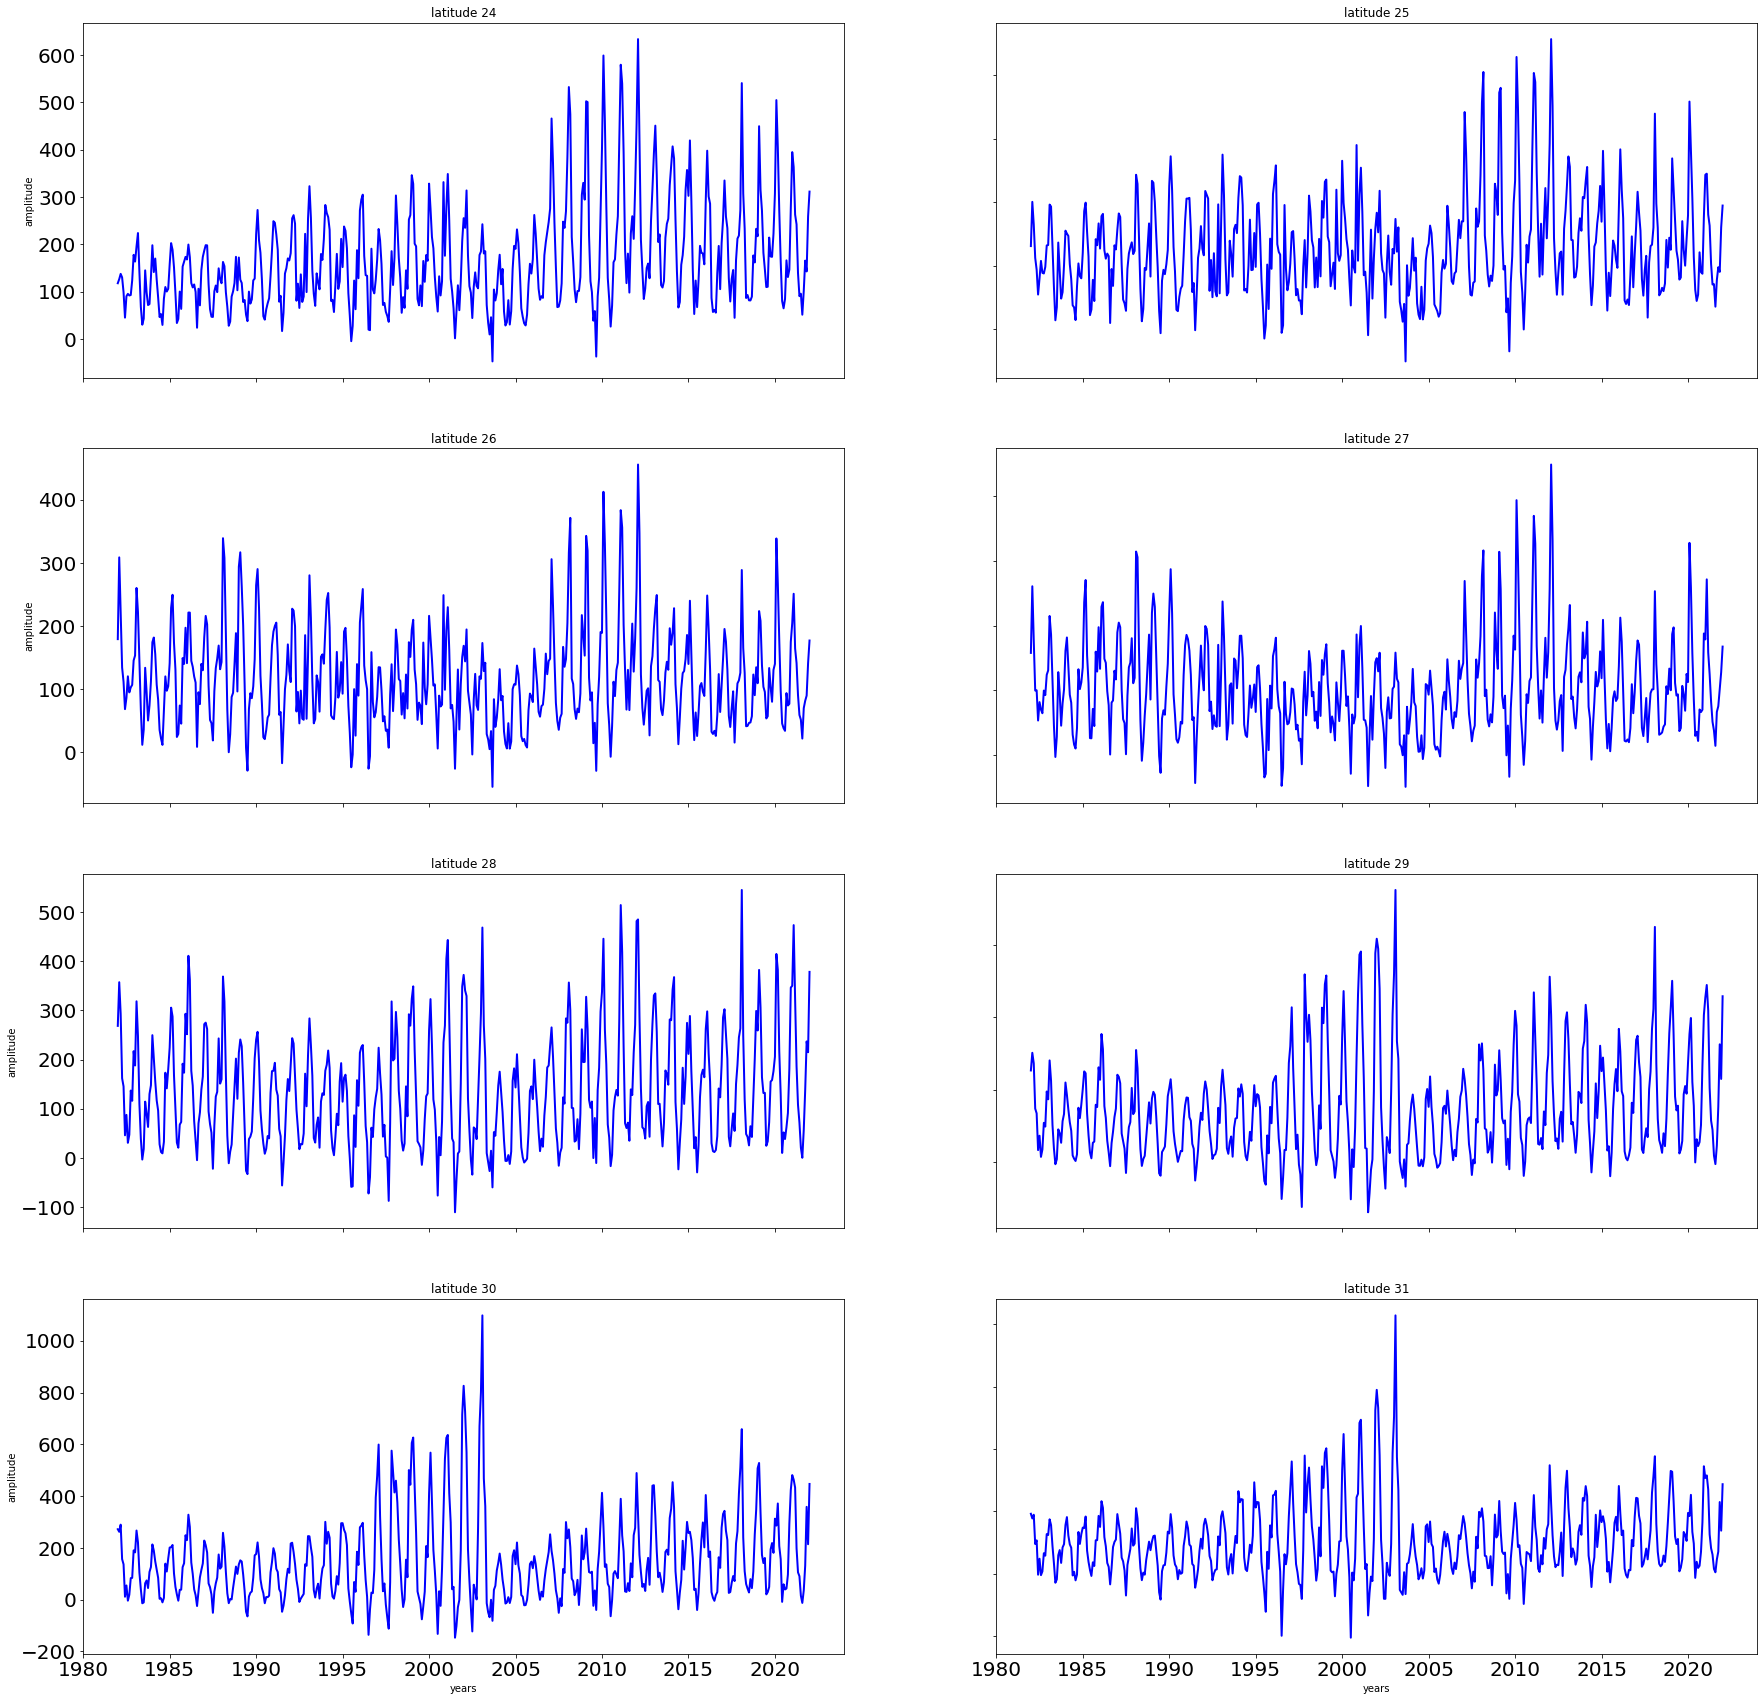

In [8]:
fig, axs = plt.subplots(4,2, figsize=(30,30))
axs[0,0].plot(time, lat_24, color='b', lw=2)
axs[0, 0].set_title('latitude 24')
axs[0,1].plot(time, lat_25, color='b', lw=2)
axs[0, 1].set_title('latitude 25')
axs[1,0].plot(time, lat_26, color='b', lw=2)
axs[1, 0].set_title('latitude 26')
axs[1,1].plot(time, lat_27, color='b', lw=2)
axs[1, 1].set_title('latitude 27')
axs[2,0].plot(time, lat_28, color='b', lw=2)
axs[2, 0].set_title('latitude 28')
axs[2,1].plot(time, lat_29, color='b', lw=2)
axs[2, 1].set_title('latitude 29')
axs[3,0].plot(time, lat_30, color='b', lw=2)
axs[3, 0].set_title('latitude 30')
axs[3,1].plot(time, lat_31, color='b', lw=2)
axs[3, 1].set_title('latitude 31')
for ax in axs.flat:
    ax.set(xlabel='years', ylabel='amplitude')
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

do cor plot, do temper-diff correlation graph. 

/opt/anaconda3/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


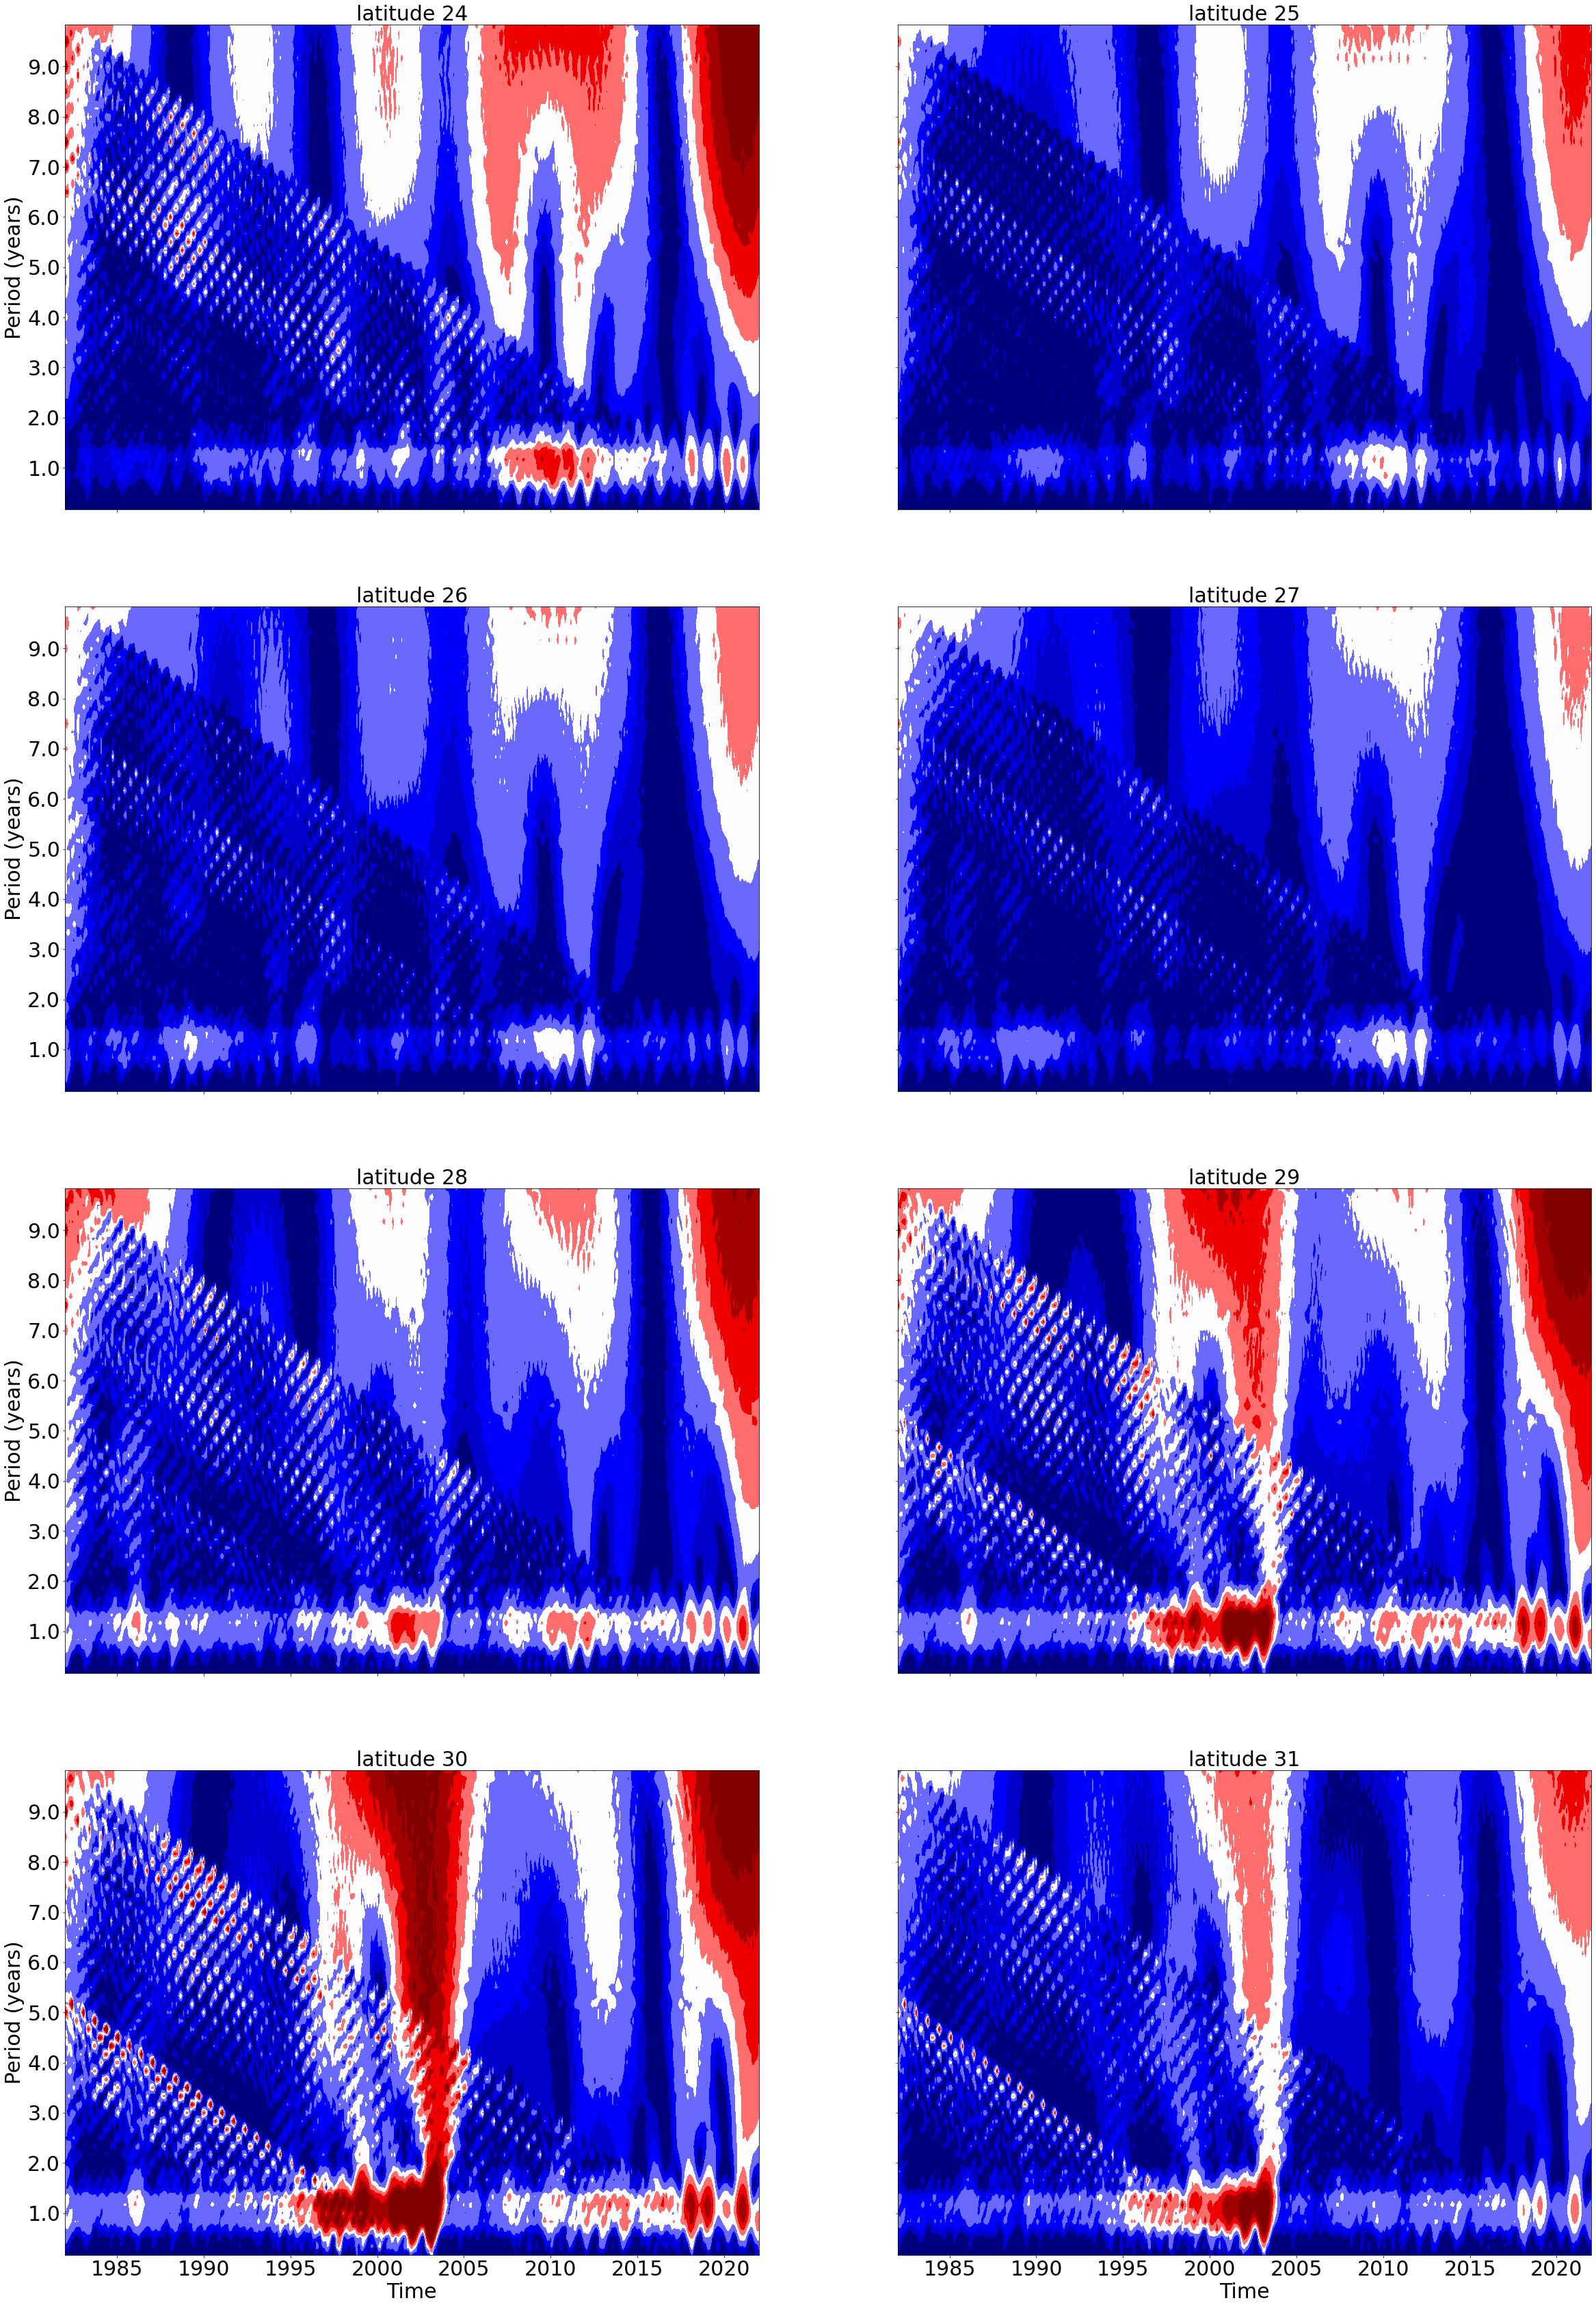

In [9]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients))
    period = 1. / frequencies
    levels = [1, 50, 75, 100, 150, 200, 250, 300, 350]
    contourlevels = np.log2(levels)
    im = ax.contourf(time, period, power, levels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=30)
    
    yticks = np.arange(np.ceil(period.min()), np.ceil(period.max()))
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[1], ylim[0])

    return yticks, ylim
scales = np.arange(1,60)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, axs = plt.subplots(4,2,figsize=(40, 60))
plot_wavelet(axs[0,0], time, lat_24, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 24')
plot_wavelet(axs[0,1], time, lat_25, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 25')
plot_wavelet(axs[1,0], time, lat_26, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 26')
plot_wavelet(axs[1,1], time, lat_27, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 27')
plot_wavelet(axs[2,0], time, lat_28, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 28')
plot_wavelet(axs[2,1], time, lat_29, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 29')
plot_wavelet(axs[3,0], time, lat_30, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 30')
plot_wavelet(axs[3,1], time, lat_31, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 31')
for ax in axs.flat:
    ax.label_outer()
plt.show()

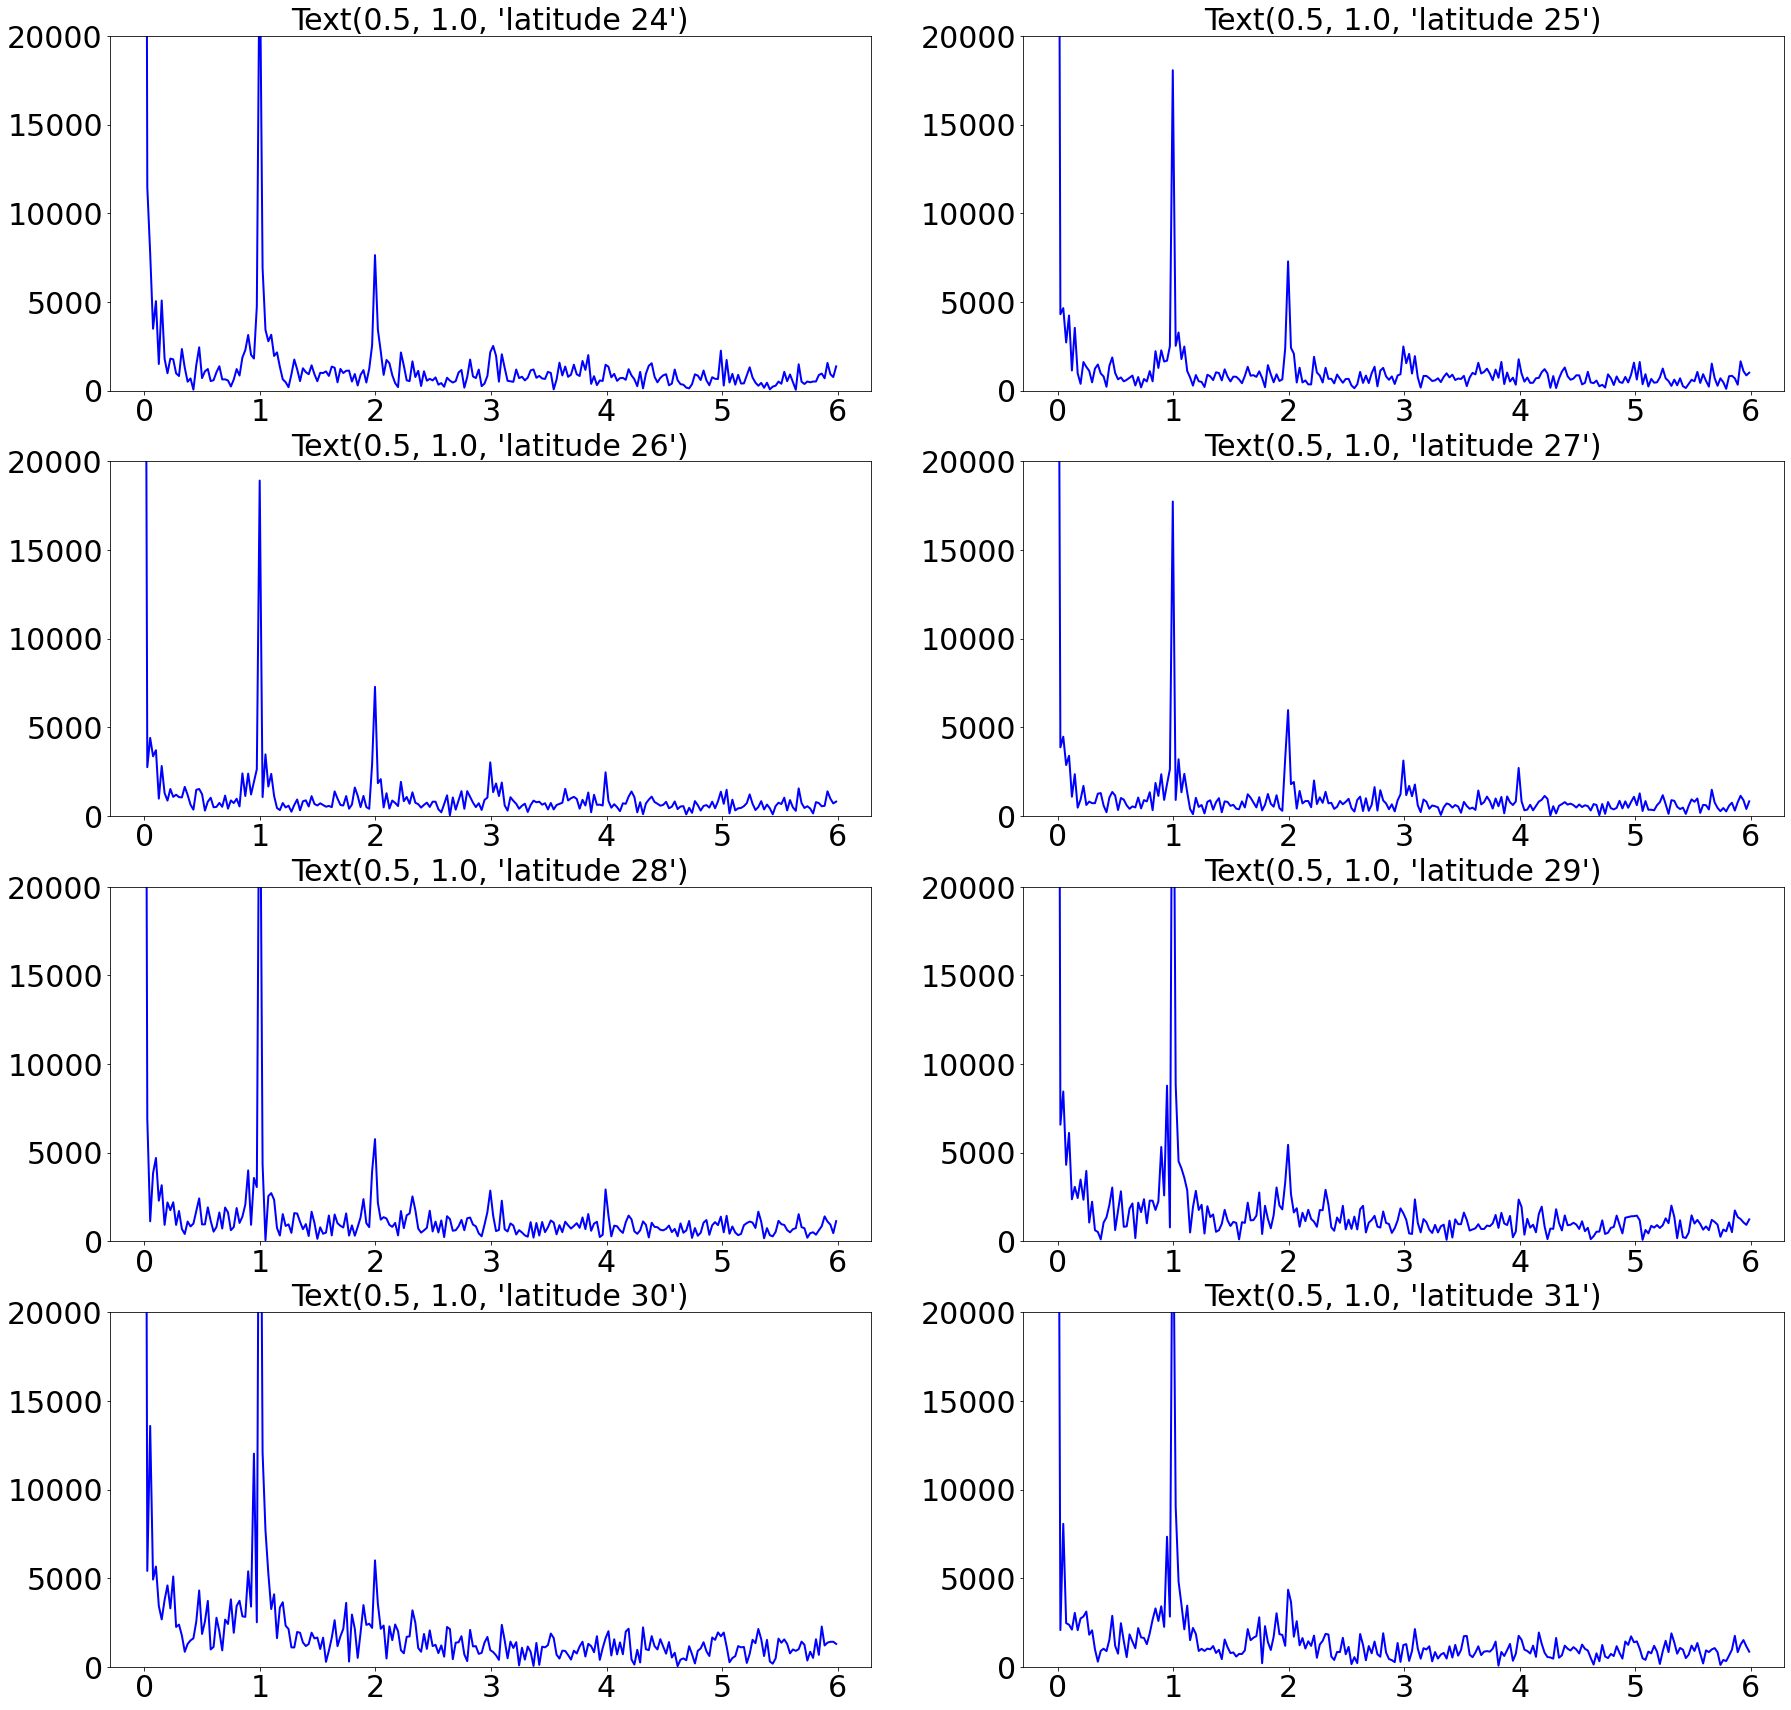

In [10]:
from scipy.fft import rfft, rfftfreq
SAMPLE_RATE = 12
# yf = rfft(signal)
# xf = rfftfreq(len(signal), 1 / SAMPLE_RATE)
# plt.ylim(20000)
# plt.gca().invert_yaxis()
# plt.plot(xf, np.abs(yf))
# plt.show()
fig, axs = plt.subplots(4,2, figsize=(30,30))
axs[0,0].plot(rfftfreq(len(lat_24), 1 / SAMPLE_RATE), np.abs(rfft(lat_24)), color='b', lw=2)
axs[0, 0].set_title('latitude 24')
axs[0,1].plot(rfftfreq(len(lat_25), 1 / SAMPLE_RATE), np.abs(rfft(lat_25)), color='b', lw=2)
axs[0, 1].set_title('latitude 25')
axs[1,0].plot(rfftfreq(len(lat_26), 1 / SAMPLE_RATE), np.abs(rfft(lat_26)), color='b', lw=2)
axs[1, 0].set_title('latitude 26')
axs[1,1].plot(rfftfreq(len(lat_27), 1 / SAMPLE_RATE), np.abs(rfft(lat_27)), color='b', lw=2)
axs[1, 1].set_title('latitude 27')
axs[2,0].plot(rfftfreq(len(lat_28), 1 / SAMPLE_RATE), np.abs(rfft(lat_28)), color='b', lw=2)
axs[2, 0].set_title('latitude 28')
axs[2,1].plot(rfftfreq(len(lat_29), 1 / SAMPLE_RATE), np.abs(rfft(lat_29)), color='b', lw=2)
axs[2, 1].set_title('latitude 29')
axs[3,0].plot(rfftfreq(len(lat_30), 1 / SAMPLE_RATE), np.abs(rfft(lat_30)), color='b', lw=2)
axs[3, 0].set_title('latitude 30')
axs[3,1].plot(rfftfreq(len(lat_31), 1 / SAMPLE_RATE), np.abs(rfft(lat_31)), color='b', lw=2)
axs[3, 1].set_title('latitude 31')
for ax in axs.flat:
    ax.set_ylim(20000,0)
    ax.invert_yaxis()
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.set_title(ax.title, fontsize=30)

/opt/anaconda3/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/opt/anaconda3/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/opt/anaconda3/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency

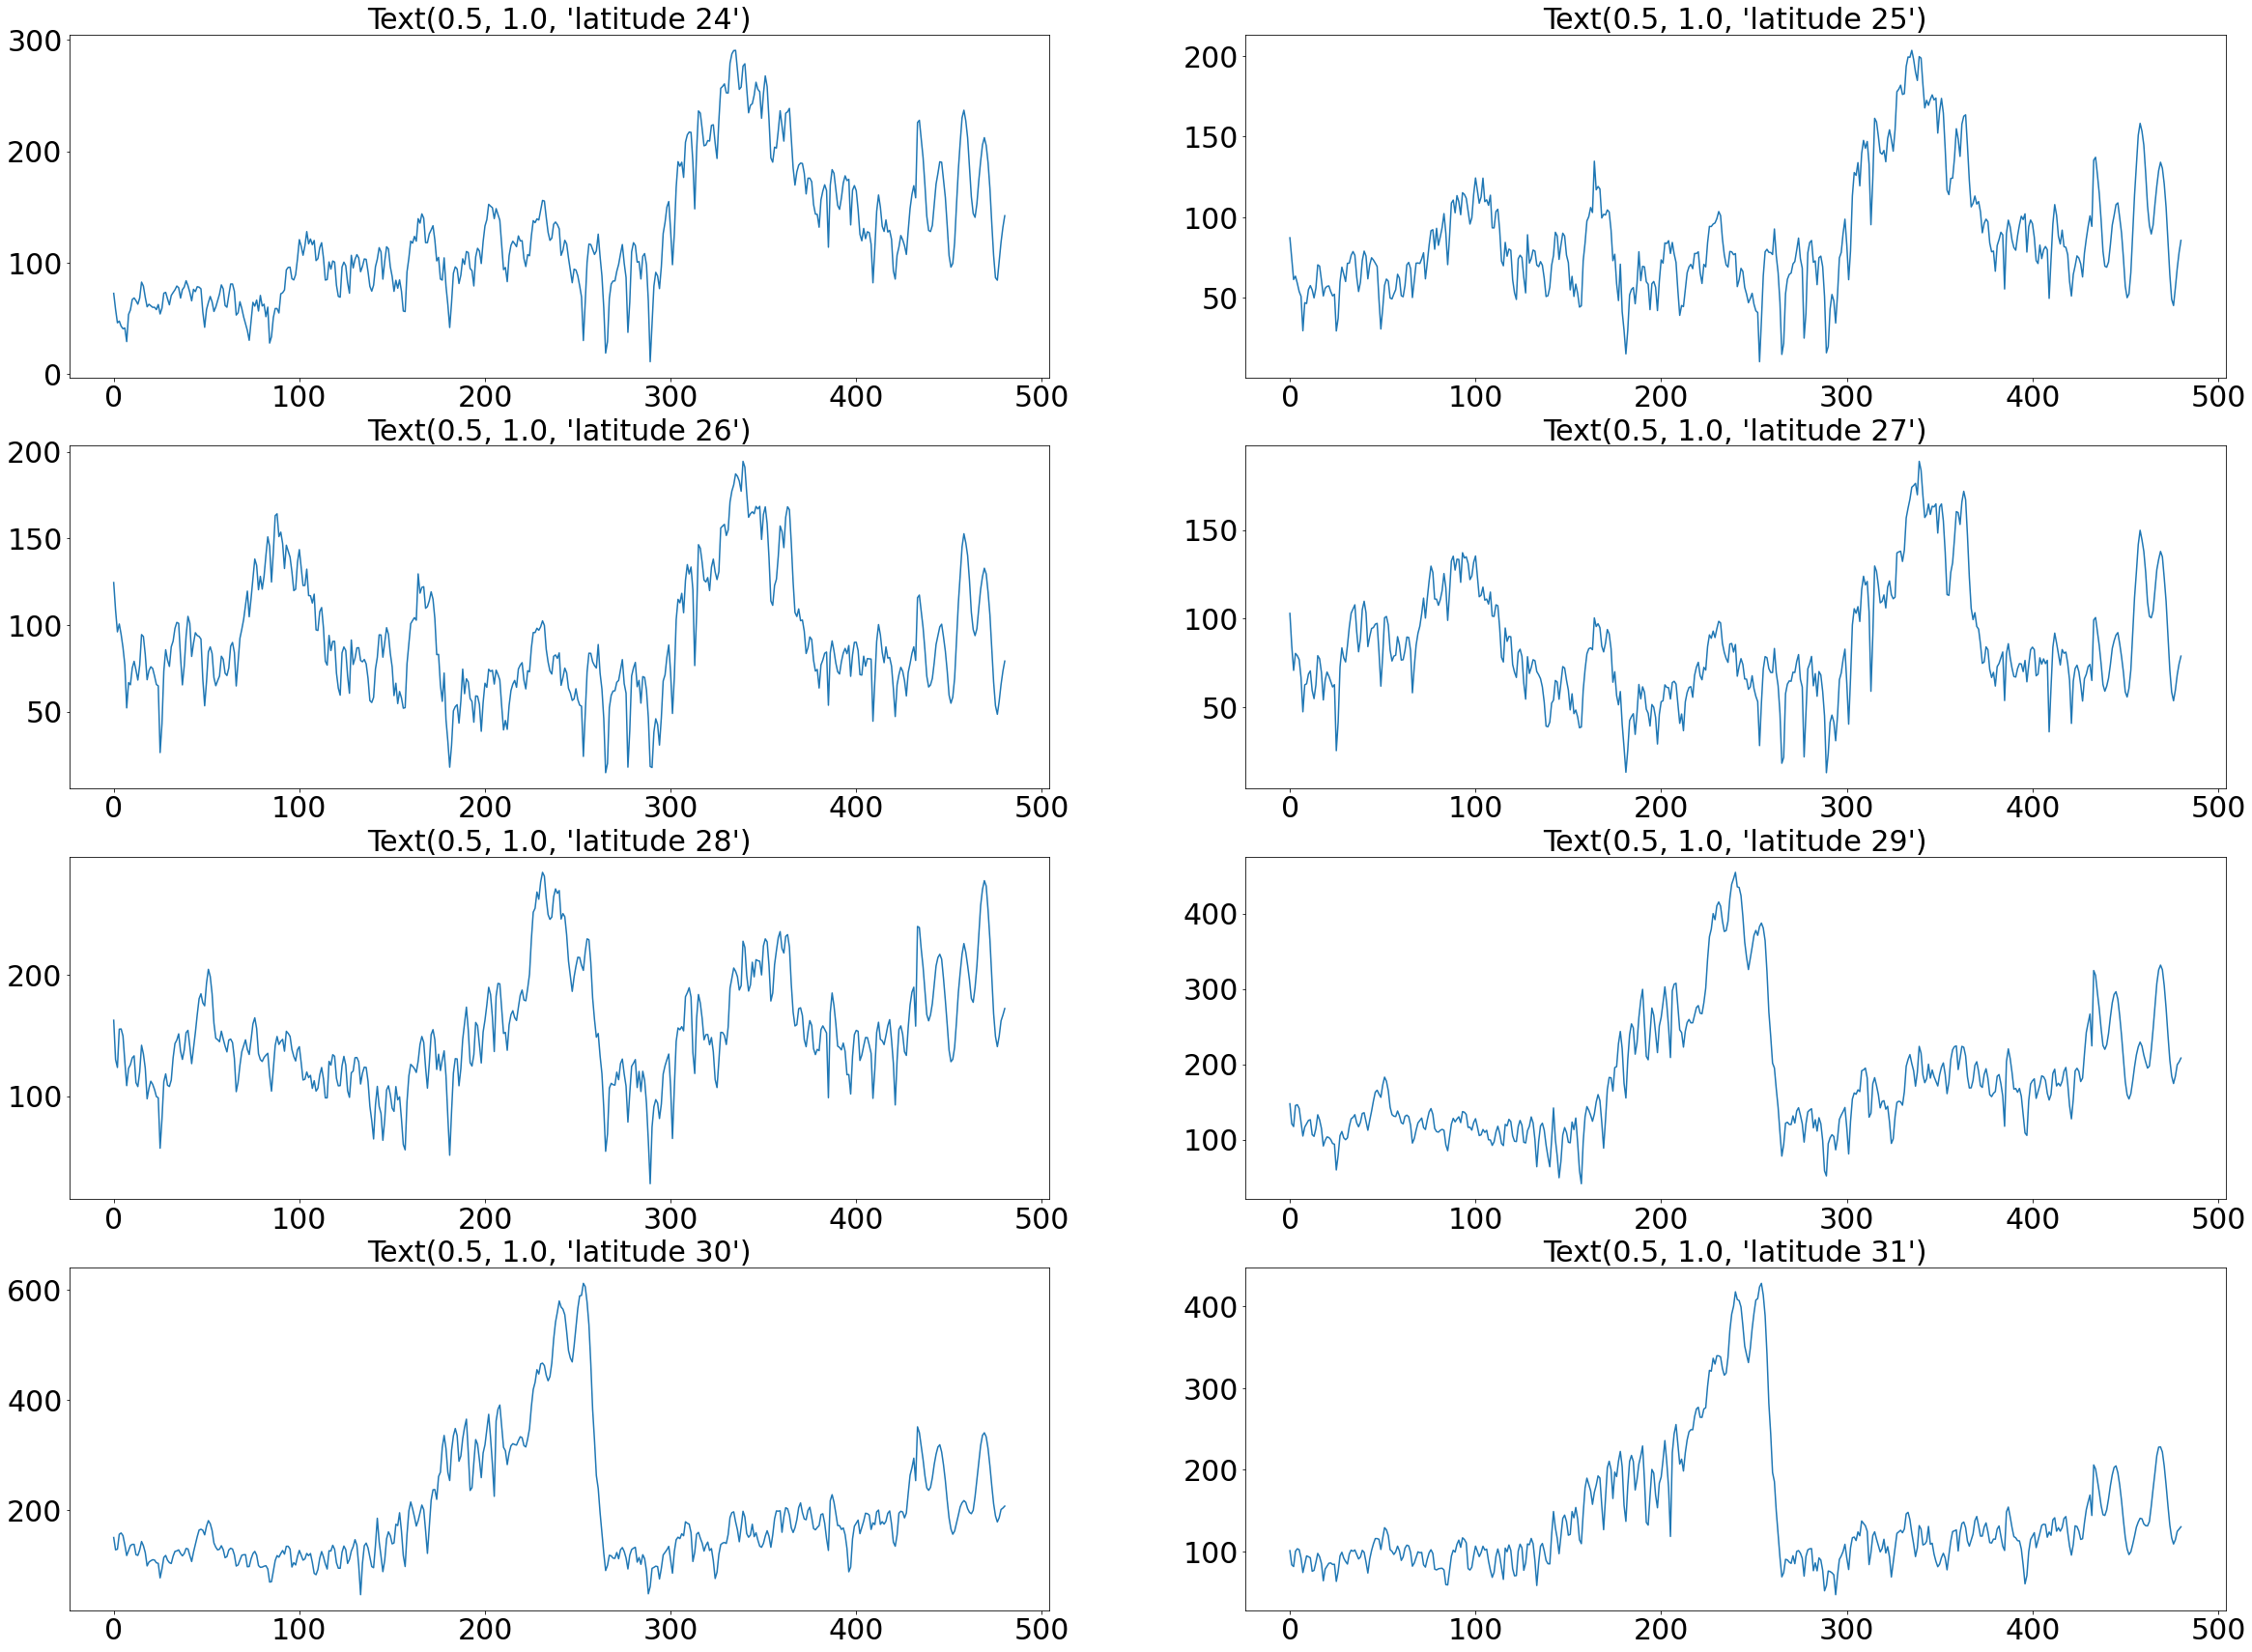

In [11]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients))
    period = 1. / frequencies
    ax.plot(power[5])
    
    ax.set_title(title, fontsize=20)
#     ax.set_ylabel(ylabel, fontsize=18)
#     ax.set_xlabel(time, fontsize=18)
#     ax.set_yticks(yticks)
#     ax.set_xticks(time)
#     ax.set_yticklabels(yticks)
#     ax.invert_yaxis()
#     ylim = ax.get_ylim()
#     ax.set_ylim(ylim[1], ylim[0])
#     return yticks, ylim
fig, axs = plt.subplots(4,2,figsize=(40, 30))
plot_wavelet(axs[0,0], time, lat_24, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 24')
plot_wavelet(axs[0,1], time, lat_25, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 25')
plot_wavelet(axs[1,0], time, lat_26, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 26')
plot_wavelet(axs[1,1], time, lat_27, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 27')
plot_wavelet(axs[2,0], time, lat_28, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 28')
plot_wavelet(axs[2,1], time, lat_29, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 29')
plot_wavelet(axs[3,0], time, lat_30, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 30')
plot_wavelet(axs[3,1], time, lat_31, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 31')
for ax in axs.flat:
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.set_title(ax.title, fontsize=30)
plt.show()


In [22]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

IndexError: list index out of range

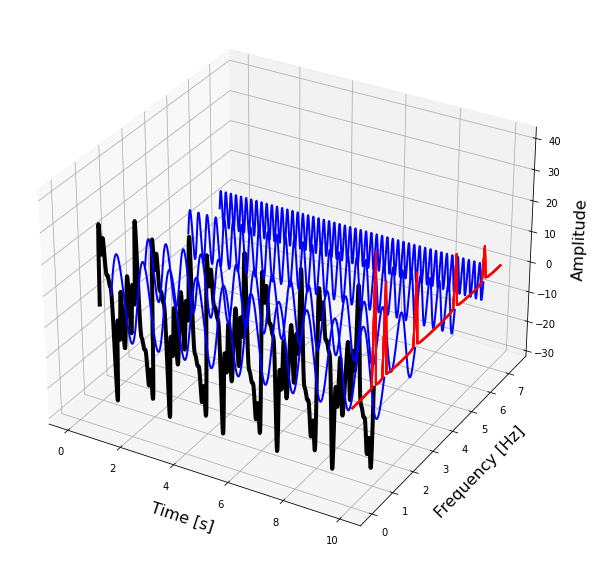

In [23]:
from mpl_toolkits.mplot3d import Axes3D
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)
 
y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]
 
for ii in range(0,len(y_values_)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal
 
    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)
 
    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

In [ ]:
Sythesize 1 year period wave data

In [37]:
import random
def period_one(x):
    return 10*np.cos(2*np.pi*x) + random.randint(0,5)

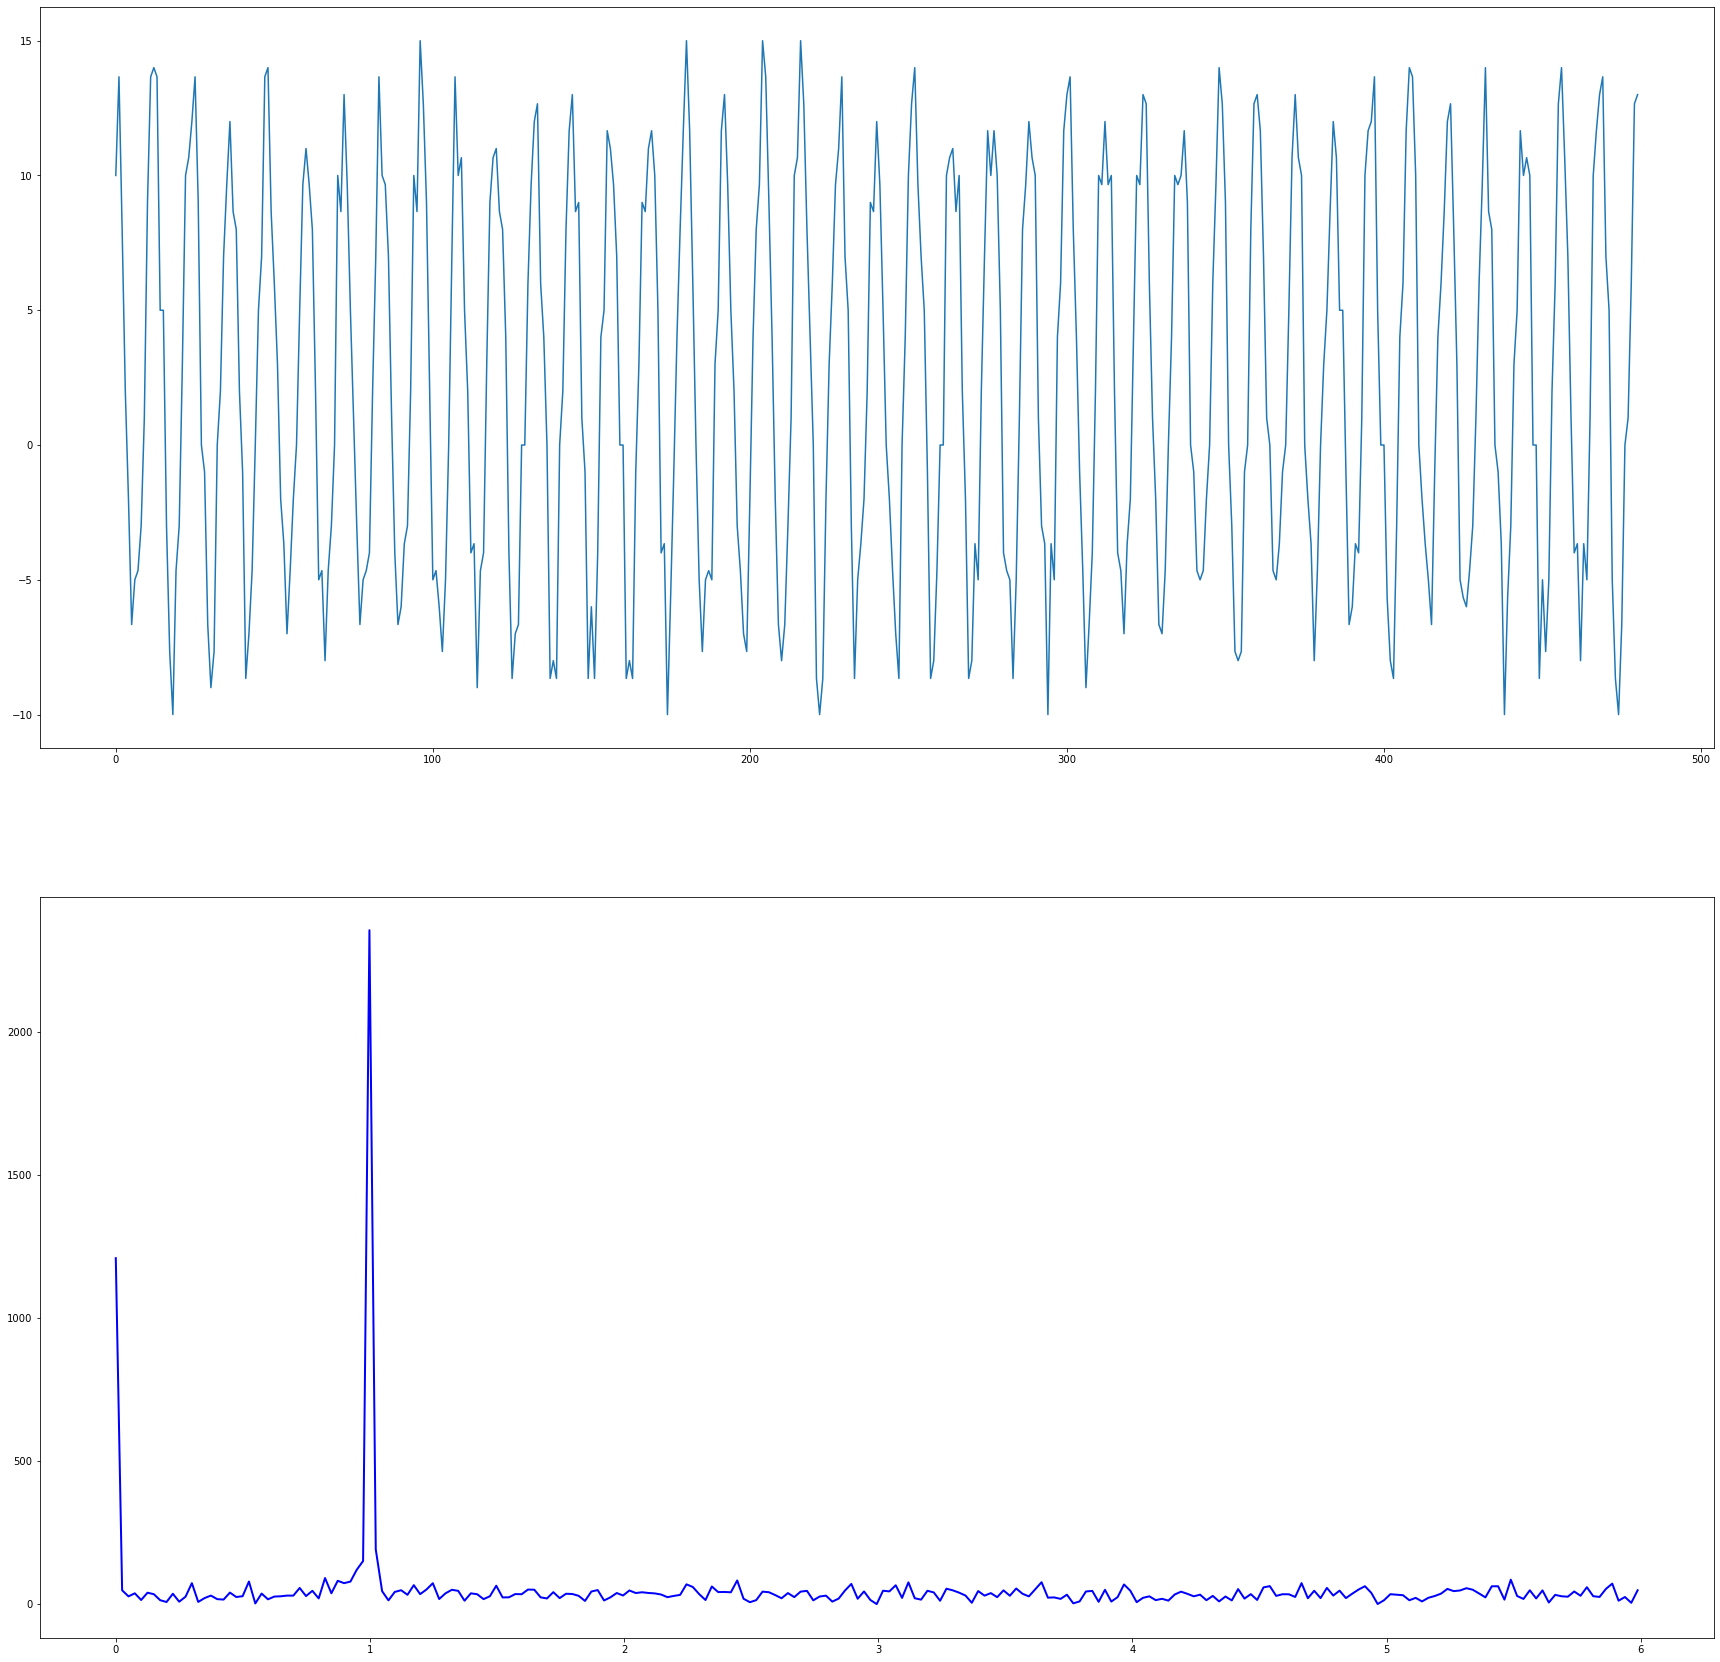

In [38]:
synthesis = [period_one(i) for i in time]
fig, axs = plt.subplots(2,1, figsize=(30,30))
axs[0].plot(synthesis)
axs[1].plot(rfftfreq(len(synthesis), 1 / SAMPLE_RATE), np.abs(rfft(synthesis)), color='b', lw=2)

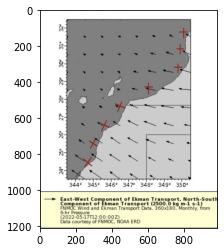

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('moroccan.jpeg')
 
# Output Images
plt.imshow(img)

Cumulative Moving Average
CMA is calculated by taking the unweighted mean of all the observations up to the time of calculation. It is used for time series analysis.
Formulae:

CMAt = (1/kt) * âˆ‘ (i=0 to k)  ai

where:

CMAt = Cumulative Moving Average at time t
kt = number of observations upto time t
ai = ith element of the set of observations

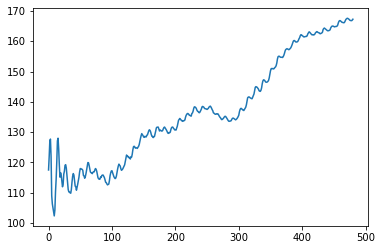

In [32]:
import numpy as np
arr = lat_24 
i = 1
# Initialize an empty list to store cumulative moving
# averages
moving_averages = []
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
  
# Loop through the array elements
while i <= len(arr):
  
    # Calculate the cumulative average by dividing
    # cumulative sum by number of elements till 
    # that position
    window_average = round(cum_sum[i-1] / i, 2)
      
    # Store the cumulative average of
    # current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
# print(moving_averages)
plt.plot(moving_averages)

do all latitudes 